In [2]:
l = [1, 2, 3, 4, 5]
l[0], l[3] #- subscriptable 타입

(1, 4)

In [4]:
for i in l:   # iterable
    print(i, end="\t")

1	2	3	4	5	

In [6]:
s = {1,2,3,4,4}
for i in s:
    print(i, end="\t")

1	2	3	4	

In [7]:
s[0]

TypeError: 'set' object is not subscriptable

# Dataset 과 DataLoader

- 딥러닝 모델을 학습시키고 평가할때 제공할 데이터셋을 관리하기 위한 클래스.
    - `Dataset`은 데이터셋을 관리하고 `DataLoader`는 Model에 데이터를 제공하는 것을 관리한다.
- **torch.utils.data.Dataset**
    - 원본 데이터셋(input/output dataset)의 위치를 가지고 있으면서 indexing으로 데이터를 **하나씩 제공**한다.
        - 제공시 data augmentation등 원본데이터를 변환해서 제공 할 수 있다.
    - subscriptable, iterable 타입.
      
    > **subscriptable타입**: indexing을 이용해 원소 조회가 가능한 타입    
    > Dataset은 **slicing과 fancy indexing은 지원하지 않는다.** 즉 한번에 여러개 데이터조회를 지원하지 않는다.
    
- **torch.utils.data.DataLoader**
    - Dataset이 제공하는 데이터를 batch size 단위 묶어서 모델에 제공하기 위한 객체.
        - iterable 타입
    - Dataset이 가지고 있는 **데이터를 모델에 어떻게 제공**할 지 batch size, shuffle 여부 등을 설정한다.
- **Dataset과 DataLoader 관계**
    - **Dataset은** raw data를 하나씩 읽어서 제공하는 기능만 제공한다.
        - **데이터를 읽어오는 것이 목적**
    - **DataLoader는** Dataset에 데이터를 모델에 주입할 batch 크기 만큼 가져오는 역할을 한다.
        - **데이터를 model에 제공하는 것이 목적**

# Built-in Dataset

- 파이토치는 분야별 공개 데이터셋을 종류별로 torchvision, torchtext, torchaudio 모듈을 통해 제공한다.
- 모든 built-in dataset은 [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)의 하위클래스로 구현되있다.
    - [computer vision dataset](https://pytorch.org/vision/stable/datasets.html)
    - [audio dataset](https://pytorch.org/audio/stable/datasets.html)
    - [text dataset](https://pytorch.org/text/stable/datasets.html)

## Image  Built-in dataset Loading
torchvision 모듈을 통해 다양한 오픈소스 이미지 데이터셋을 loading할 수 있는 Dataset 클래스를 제공한다.

- 각 Dataset 클래스의 주요 매개변수 (클래스들 마다 약간의 차이가 있다.)
    - **root**: str
        - Raw data를 저장할 디렉토리 경로
    - **train**: bool
        - True일경우 Train set을 False일 경우 Test set을 load
    - **download**: bool
        - True이면 root에 지정된 경로에 raw 데이터를 인터셋에서 download할지 여부. 이미 저장되 있는 경우 download하지 않는다.
    - **transform**: function
        - Loading한 이미지를 변환하는 function.
            - Normalization이나 data Agumentation 처리를 한다.
            

In [9]:
import torch
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset

In [12]:
#############
# MNIST Dataset loading
############
data_dir_path = r"c:\classes\deeplearning\datasets"
mnist_trainset = datasets.MNIST(
    root=data_dir_path, 
    train=True,
    download=True,    
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting c:\classes\deeplearning\datasets\MNIST\raw\train-images-idx3-ubyte.gz to c:\classes\deeplearning\datasets\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting c:\classes\deeplearning\datasets\MNIST\raw\train-labels-idx1-ubyte.gz to c:\classes\deeplearning\datasets\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting c:\classes\deeplearning\datasets\MNIST\raw\t10k-images-idx3-ubyte.gz to c:\classes\deeplearning\datasets\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting c:\classes\deeplearning\datasets\MNIST\raw\t10k-labels-idx1-ubyte.gz to c:\classes\deeplearning\datasets\MNIST\raw



In [13]:
mnist_testset = datasets.MNIST(
    root=data_dir_path,
    train=False, # test set
    download=True
)

In [15]:
print(type(mnist_trainset))
print(isinstance(mnist_trainset, Dataset))

<class 'torchvision.datasets.mnist.MNIST'>
True


In [16]:
mnist_trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: c:\classes\deeplearning\datasets
    Split: Train

In [17]:
mnist_testset

Dataset MNIST
    Number of datapoints: 10000
    Root location: c:\classes\deeplearning\datasets
    Split: Test

In [21]:
# Dataset의 데이터개수 확인
print("trainset 데이터수:", len(mnist_trainset))
# Data indexing
zero_idx = mnist_trainset[0] # (X, y)
print(type(zero_idx))
print(type(zero_idx[0]))  # input: X
print(type(zero_idx[1]))  # output: y

trainset 데이터수: 60000
<class 'tuple'>
<class 'PIL.Image.Image'>
<class 'int'>


In [22]:
zero_idx[0]

In [23]:
zero_idx[1]

5

In [27]:
print(mnist_trainset[1][1])
mnist_trainset[1][0]

0


In [28]:
mnist_trainset2 = datasets.MNIST(
    root=data_dir_path, 
    train=True,
    download=True,
    transform=transforms.ToTensor(), ### 읽은 data를 어떻게 변환할 지 정의한 함수/객체
)

# ToTensor() -> ndarray, PIL.Image를 torch.Tensor 로 변환.
#                   shape을 변환 (channel, height, width)
#                   pixcel값을 0 ~ 1 변환.(scaling)

In [30]:
type(mnist_trainset2[0])

tuple

In [31]:
x, y = mnist_trainset2[0]
y

5

In [32]:
type(x)

torch.Tensor

In [33]:
x.min(), x.max()

(tensor(0.), tensor(1.))

In [34]:
x.shape

torch.Size([1, 28, 28])

In [35]:
###### y의 class 확인
mnist_trainset.class_to_idx  # dict: key-class name, value - class (index)

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [36]:
mnist_trainset.classes       # list: index-class, value-class name

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [37]:
mnist_trainset.classes[1]

'1 - one'

### TODO

- CIFAR10 Built-in dataset 을 LOADING 후 다음을 확인하시오.
    1. Dataset loading
    1. train dataset, test dataset의 데이터 개수 확인
    1. class index - class name 확인
    1. train set의 이미지 5장을 출력. label의 이름을 title로 출력.

In [1]:
from torchvision import datasets

In [26]:
cifa10_trainset = datasets.CIFAR10(
    root=r"C:\Classes\deeplearning\datasets", # Dataset이 있는 경로. 
    train=True,  # Trainset: True, Testset: False
    download=True, # root에 data가 없으면 다운로드 받을지 여부. 
)

4.1%


KeyboardInterrupt: 

In [3]:
cifa10_testset = datasets.CIFAR10(
    root=r"C:\Classes\deeplearning\datasets", # Dataset이 있는 경로. 
    train=False,  # Trainset: True, Testset: False
    download=True, # root에 data가 없으면 다운로드 받을지 여부. 
)

AttributeError: module 'torchvision.datasets' has no attribute 'CIFA10'

In [4]:
##### STL10 dataset 
root_path = r"C:\Classes\deeplearning\datasets"
stl_trainset = datasets.STL10(
    root=root_path, # Dataset 저장 경로    
    split="train",
    download=True
)
stl_testset = datasets.STL10(
    root=root_path,
    split="test",
    download=True
)

100.0%


Extracting C:\Classes\deeplearning\datasets\stl10_binary.tar.gz to C:\Classes\deeplearning\datasets
Files already downloaded and verified


In [5]:
print(stl_trainset)
print("---------------------")
print(stl_testset)

Dataset STL10
    Number of datapoints: 5000
    Root location: C:\Classes\deeplearning\datasets
    Split: train
---------------------
Dataset STL10
    Number of datapoints: 8000
    Root location: C:\Classes\deeplearning\datasets
    Split: test


In [6]:
# data 개수를 int 조회
print(len(stl_trainset))
print(len(stl_testset))

5000
8000


In [7]:
# Data1개 조회
stl_trainset[0]  # tuple(이미지, label)  : 분류 - 사진-주제(대상)

(<PIL.Image.Image image mode=RGB size=96x96>, 1)

In [8]:
# class - classname 조회
stl_trainset.classes  # list - index: class index, value: class name

['airplane',
 'bird',
 'car',
 'cat',
 'deer',
 'dog',
 'horse',
 'monkey',
 'ship',
 'truck']

In [10]:
stl_trainset.classes[stl_trainset[0][1]]

'bird'

2 car


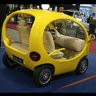

In [17]:
idx = 100
class_name = stl_trainset.classes
result = stl_trainset[idx]  # tuple(0: X, 1: y)
print(result[1], class_name[result[1]])  
result[0]

1 bird


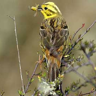

5 dog


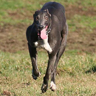

1 bird


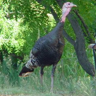

6 horse


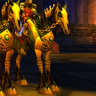

3 cat


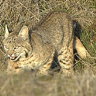

In [21]:
### 반복문을 이용해 출력. PIL.Image 를 출력 - display(img) -> 주피터 노트북 라이브러리.
from IPython.display import display
for idx in range(5):
    img, label = stl_trainset[idx]
    print(label, class_name[label])
    display(img)

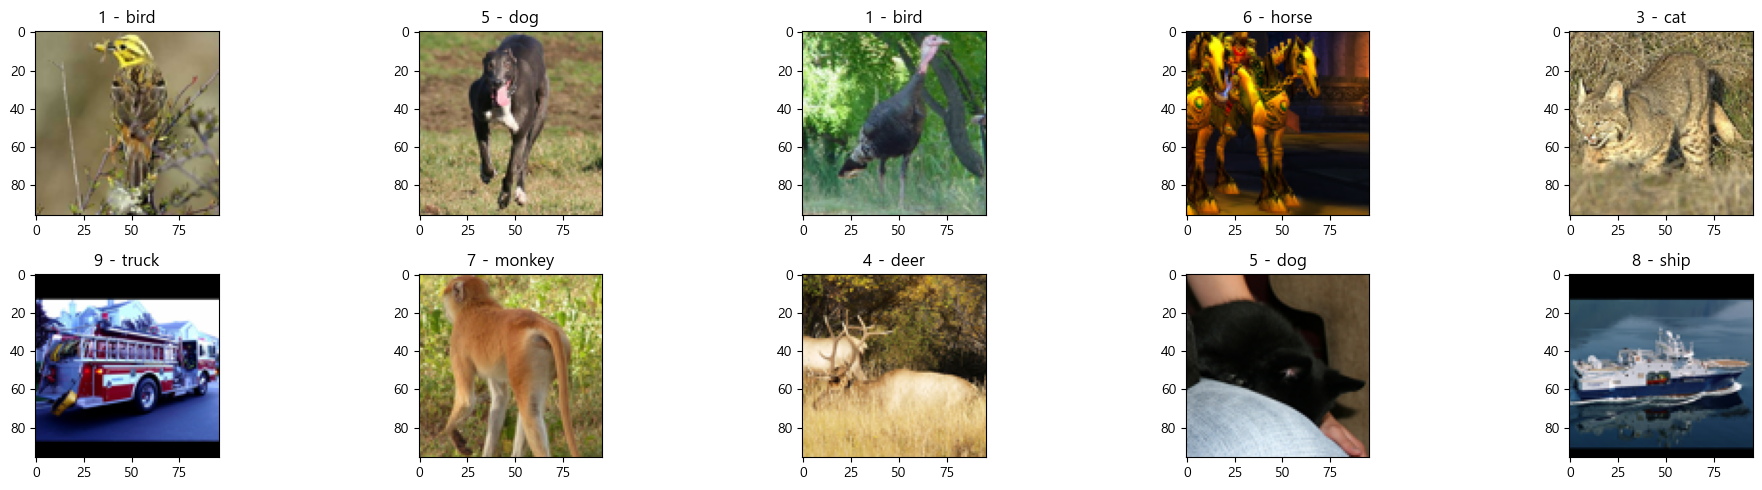

In [25]:
# matplotlib 으로 출력
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20, 5))
for idx in range(10):
    plt.subplot(2, 5, idx+1)
    img, label = stl_trainset[idx]
    #PIL.Image -> ndarray 변환. np.array(Image), ndarray->Image: Image.fromarray(ndarray)
    img_array = np.array(img)  
    plt.imshow(img_array)
    plt.title(f"{label} - {class_name[label]}")

plt.tight_layout()
plt.show()

### transform 매개변수를 이용한 데이터전처리
-  Dataset 생성할 때 전달하는 함수로 원본 영상 데이터를 모델에 주입(feeding)하기 전 **전처리 과정을 정의한다.**
    - Data Pipeline을 구성하는 함수
- 매개변수로 input data 한개를 입력받아 처리한 결과를 반환하도록 구현한다.

In [30]:
stl_trainset[0]

(<PIL.Image.Image image mode=RGB size=96x96>, 1)

In [31]:
from torchvision import transforms, datasets
# transforms: 영상데이터(이미지)를 변환 처리하는 (전처리) 
#                                  다양한 함수들,호출가능한 객체들을 제공하는 모듈
# Dataset에 설정 -> 원본이미지를 전처리한 결과를 반환 하도록 정의가능.
stl_trainset2 = datasets.STL10(root=root_path, split="train", download=True, 
                              transform=transforms.ToTensor() # ToTensor: 호출가능한 클래스
                              )

Files already downloaded and verified


In [42]:
x_0, _ = stl_trainset[0]
print(type(x_0))
arr = np.array(x_0)
print(arr.shape, arr.dtype, arr.min(), arr.max())

<class 'PIL.Image.Image'>
(96, 96, 3) uint8 0 255


In [37]:
x, y = stl_trainset2[0] # tuple(input, output)
print(type(x), x.dtype, x.min(), x.max())
print(x.shape)

<class 'torch.Tensor'> torch.float32 tensor(0.) tensor(1.)
torch.Size([3, 96, 96])


### torchvision.transforms.ToTensor
 -  PIL Image나 NumPy ndarray 를 FloatTensor(float32) 로 변환하고, 이미지의 픽셀의 크기(intensity) 값을 \[0., 1.\] 범위로 비례하여 조정한다.
 - Image 의 shape을 (channel, height, width) 로 변경한다.
 - https://pytorch.org/vision/stable/transforms.html

### transform.Normalize
- 채널별로 지정한 평균을 뺀 뒤 지정한 표준편차로 나누어서 정규화를 진행한다.
- ToTensor()로 변환된 데이터를 받아서 추가 변환
    -  여려 변환 순서대로 한번에 할 경우 `torchvision.transforms.Compose` 클래스를 이용해서 묶어준다.

In [51]:
import torch
x, _ = stl_trainset2[0]
x2  = transforms.Normalize(mean=100, std=20)(x)
print(x2.min(), x2.max())

tensor(-5.) tensor(-4.9500)


In [52]:
(0-100)/20, (1 - 100)/20

(-5.0, -4.95)

In [53]:
# 0 ~ 1(ToTensor) -> 평균: 0.5, 표준편차: 0.5 (Normalize)
(0-0.5/0.5), (1-0.5)/0.5

(-1.0, 1.0)

In [62]:
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize(mean=0.5, std=0.5)  # 모든 채널에 동일한 값을 적용: 상수., 채널별로 다른 값 적용: 리스트.
])
# Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
stl_trainset3 = datasets.STL10(root_path, split="train", download=True, 
                              transform=transform # ToTensor -> Normalize : 순서대로 묶어서 전달.=> Compose()
                              )
stl_testset3 = datasets.STL10(root_path, split="test", download=True, 
                              transform=transform # ToTensor -> Normalize : 순서대로 묶어서 전달.=> Compose()
                              )

Files already downloaded and verified
Files already downloaded and verified


In [63]:
len(stl_trainset3), len(stl_testset3)

(5000, 8000)

In [65]:
x2, _ = stl_trainset3[5] # 0 ->index -> 몇번째 data인지의 index
print(_)
print(type(x2), x2.dtype, x2.type())
print(x2.shape, x2.min(), x2.max())

9
<class 'torch.Tensor'> torch.float32 torch.FloatTensor
torch.Size([3, 96, 96]) tensor(-1.) tensor(1.)


In [66]:
stl_trainset3

Dataset STL10
    Number of datapoints: 5000
    Root location: C:\Classes\deeplearning\datasets
    Split: train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )

## DataLoader 생성

- DataLoader
    - 모델이 학습하거나 추론할 때 Dataset의 데이터를 모델에 제공해준다. (feeding)
    - initalizer속성
        - dataset: 값을 제공하는 Dataset 타입 객체
        - batch_size: 한번에 값을 제공할 batch 크기
        - shuffle: 에폭마다 데이터셋을 섞을 지 여부 (default: False)
        - drop_last: 마지막 배치의 데이터개수가 batch_size 설정보다 적을 경우 모델에 제공하지 않는다.


In [105]:
import torch
from torch.utils.data import DataLoader
device = "cuda" if torch.cuda.is_available() else "cpu"

# Train set을 모델에 제공하기 위한 DataLoader
stl_trainloader = DataLoader(
    dataset=stl_trainset3, # Dataset 지정. 
    batch_size=32,         # Batch size: 한번에 모델에 제공할 데이터 개수.
    shuffle=True,           # 한  epoch 끝나고 데이터셋을 한번 썩을지 여부.(default: False)
    drop_last=True,        # 마지막 batch 크기가 batch_size보다 적으면 모델에 제공할지 여부(default:False)
    # generator=torch.Generator(device="mps")  # mac
)

In [69]:
# Test set을 모델에 제공하기 위한 DataLoader
### validation, test data loader: shuffle, drop_last는 설정하지 않는다. (False)
stl_testloader = DataLoader(
    dataset=stl_testset3, batch_size=32
)

In [77]:
# DataLoader: iterable 타입 -> for in 문에서 반복 조회가 가능. 
#                                        -> 한번 반복시 batch_size 개수만큼 데이터를 제공.
print("step 수 확인")  # 몇번만에 데이터를 다 제공하는지. (epoch당 step 수)
# 전체 데이터개수 // batch_size       #(drop_last=True)
# ceil(전체 데이터개수 / batch_size)  #(drop_last=False)
print(len(stl_trainloader), len(stl_testloader))

step 수 확인
156 250


In [79]:
#### DataLoader의 Dataset을 조회 : DataLoder.dataset
stl_trainloader.dataset
stl_trainloader.batch_size

32

In [ ]:
##### 1 step용 batch 데이터들 조회
## iterable을 타입은 iterator를 먼저 조회.   iterator = iter(iterable)
##  iterator를 이용해서 값을 조회             value = next(iterator)
#####  iterable: 제공할 데이터들을 가지고 있는 객체
#####  iterator:  iterable의 값을 제공해주는 객체.

In [91]:
# DataLoader -> Iterable type. Subscriptable type은 아니다. (indexing 못한다.)
# stl_trainloader[0]
iterator = iter(stl_trainloader)
# print(type(iterator))
v = next(iterator)  # 값을 하나씩 하나씩 제공.

In [94]:
print(type(v), len(v))  # [X batch들, y batch들]

<class 'list'> 2


In [96]:
v[0].shape # [32: batchsize, 3:channel, 96:height, 96:width]

torch.Size([32, 3, 96, 96])

In [109]:
v[1].shape
v[1]

tensor([6, 8, 9, 6, 4, 3, 3, 6, 5, 3, 5, 0, 5, 0, 9, 1, 0, 5, 1, 6, 4, 8, 0, 1,
        7, 0, 9, 2, 8, 0, 2, 7])

In [106]:
for idx, (X_train, y_train) in enumerate(stl_trainloader, start=1):
    print(f"{idx}. {X_train.shape} -  {y_train.shape}")

1. torch.Size([32, 3, 96, 96]) -  torch.Size([32])
2. torch.Size([32, 3, 96, 96]) -  torch.Size([32])
3. torch.Size([32, 3, 96, 96]) -  torch.Size([32])
4. torch.Size([32, 3, 96, 96]) -  torch.Size([32])
5. torch.Size([32, 3, 96, 96]) -  torch.Size([32])
6. torch.Size([32, 3, 96, 96]) -  torch.Size([32])
7. torch.Size([32, 3, 96, 96]) -  torch.Size([32])
8. torch.Size([32, 3, 96, 96]) -  torch.Size([32])
9. torch.Size([32, 3, 96, 96]) -  torch.Size([32])
10. torch.Size([32, 3, 96, 96]) -  torch.Size([32])
11. torch.Size([32, 3, 96, 96]) -  torch.Size([32])
12. torch.Size([32, 3, 96, 96]) -  torch.Size([32])
13. torch.Size([32, 3, 96, 96]) -  torch.Size([32])
14. torch.Size([32, 3, 96, 96]) -  torch.Size([32])
15. torch.Size([32, 3, 96, 96]) -  torch.Size([32])
16. torch.Size([32, 3, 96, 96]) -  torch.Size([32])
17. torch.Size([32, 3, 96, 96]) -  torch.Size([32])
18. torch.Size([32, 3, 96, 96]) -  torch.Size([32])
19. torch.Size([32, 3, 96, 96]) -  torch.Size([32])
20. torch.Size([32, 3

## Custom Dataset 구현

1. `torch.utils.data.Dataset` 클래스를 상속한 클래스를 정의한다.
2. `__init__(self, ...)` 
    - DataSet객체 생성시 필요한 설정들을 초기화 한다. 
    - ex) Data저장 경로, transform 설정 여부 등
3. `__len__(self)`
    - 총 데이터 수를 반환하도록 구현한다.
    - DataLoader가 Batch 생성할 때 사용한다.
4. `__getitem__(self, index)`
    - index의 Data point를 반환한다.
    - input(X), output(y) 를 튜플로 반환한다.
    - transform이 있을 경우 변환처리한 input을 반환한다.

In [134]:
# subscriptable type 클래스 구현.  ->  indexing 가능한 클래스.
###   __getitem__(self, index) 특수메소드를 추가. ==== indexing 연산자와 연결.
###  __len__(self) 특수메소드 ====== len() 함수와 연결.
class MySub:
    def __init__(self):
        # 제공할 데이터들을 초기화.
        self.one = "호랑이"
        self.two = "사자"
        self.three = "기린"

    def __getitem__(self, index):
        ## index(key)를 받아서 그 index(key)의 값을 반환.
        # print("0000000000000")
        if index == 0:
            return self.one
        elif index == 1:
            return self.two
        elif index == 2:
            return self.three
        else:
            raise IndexError(f"{index} 번째 value가 없습니다.")

    def __len__(self):
        # len(객체) 시 호출되는 메소드. -> 제공할 데이터의 개수를 반환.
        return 3

In [135]:
ms = MySub()
ms[0]  # ms.__getitem__(0)
ms[1]
ms[2]
# ms[3]

'기린'

In [136]:
len(ms)

3

In [145]:
from torch.utils.data import Dataset
isinstance(stl_testset, Dataset)

True

In [ ]:
# images.tar.gz

# OxfordPet Dataset 생성
- https://www.robots.ox.ac.uk/~vgg/data/pets/
- 개,고양이 37가지 품종
- 품종별로 200장 정도씩 구성됨. (품종별로 이미지 개수는 다르다)
- 목표
    - train: 70%, validation: 20%, test: 10%

1. 데이터파일 다운로드
2. 압축 풀기
3. 데이터파일 경로 목록 생성
4. 전처리 -> jpg color 를 제외한 이미지는 삭제.
5. y값 정의 -> 파일명을 이용해서 각 이미지들의 품종값을 추출해서 y값 정의
6. train/validation/test set 분리
7. Dataset을 정의

In [146]:
import os
import re
from glob import glob
import tarfile
from PIL import Image

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

img_tarfile_path = r"c:\Classes\images.tar.gz"
pet_data_path = r"c:\Classes\deeplearning\datasets"  # 압축 풀 경로
pet_image_path = os.path.join(pet_data_path, "images") # 압축 풀린 이미지가 있는 경로

In [147]:
# 2. 압축 풀기
with tarfile.open(img_tarfile_path) as tar: # 압축풀 파일과 연결.
    tar.extractall(pet_data_path)  # 압축풀 경로를 넣어서 풀기. (경로지정안하면 현재경로에 품.)

In [150]:
# 3. 이미지 파일 경로 목록
file_list = glob(pet_image_path+"\\*.jpg")
file_list[:5]

['c:\\Classes\\deeplearning\\datasets\\images\\Abyssinian_1.jpg',
 'c:\\Classes\\deeplearning\\datasets\\images\\Abyssinian_10.jpg',
 'c:\\Classes\\deeplearning\\datasets\\images\\Abyssinian_100.jpg',
 'c:\\Classes\\deeplearning\\datasets\\images\\Abyssinian_101.jpg',
 'c:\\Classes\\deeplearning\\datasets\\images\\Abyssinian_102.jpg']

In [155]:
f = file_list[0]  # 한 파일의 경로:  디렉토리경로 + 파일명.
# os.path 모듈 -> 파일/디렉토리 경로를 다루는 함수들을 제공.
print("파일경로에서 디렉토리경로만 조회:", os.path.dirname(f))
print("파일경로에서 파일명만 조회:", os.path.basename(f))
print("파일경로에서 확장자를 분리:", os.path.splitext(f))  # (확장자뺀경로, 확장자)

파일경로에서 디렉토리경로만 조회: c:\Classes\deeplearning\datasets\images
파일경로에서 파일명만 조회: Abyssinian_1.jpg
파일경로에서 확장자를 분리: ('c:\\Classes\\deeplearning\\datasets\\images\\Abyssinian_1', '.jpg')


In [156]:
os.path.splitext("my_file.txt")

('my_file', '.txt')

In [158]:
len(file_list)

7390

In [163]:
# 4. JPG Color 가 아닌 이미지파일을 삭제. 
## 파일삭제:  os.remove(삭제할파일경로)
## 이미지 모드 -> PIL.Image.mode -> 어떤 종류의 이미지인지의 속성값.: str: L-grayscale, 'RGB': RGB 컬러
#### PIL.Image로 개별 이미지를 연결후 RGB가 아닌 이미지는 제거.
remove_cnt = 0 # 파일 몇개 삭제했는지 저장.
for file in file_list:
    # 이미지파일과 연결
    with Image.open(file) as img:
        image_mode = img.mode # "RGB", "L": grayscale, 
        
    if image_mode != "RGB": # RGB 가 아닌 파일은 제거
        os.remove(file)
        remove_cnt += 1
        print(f"삭제파일명: {os.path.basename(file)}, mode: {image_mode}")

삭제파일명: Abyssinian_34.jpg, mode: P
삭제파일명: Abyssinian_5.jpg, mode: RGBA
삭제파일명: Egyptian_Mau_129.jpg, mode: L
삭제파일명: Egyptian_Mau_139.jpg, mode: P
삭제파일명: Egyptian_Mau_14.jpg, mode: RGBA
삭제파일명: Egyptian_Mau_145.jpg, mode: P
삭제파일명: Egyptian_Mau_167.jpg, mode: P
삭제파일명: Egyptian_Mau_177.jpg, mode: P
삭제파일명: Egyptian_Mau_186.jpg, mode: RGBA
삭제파일명: Egyptian_Mau_191.jpg, mode: P
삭제파일명: staffordshire_bull_terrier_2.jpg, mode: L
삭제파일명: staffordshire_bull_terrier_22.jpg, mode: L


In [164]:
remove_cnt

12

In [165]:
### 이미지 파일목록을 갱신
file_list = glob(pet_image_path+"\\*.jpg")
print(len(file_list))

7378


### index_to_class, class_to_index 생성
- index: class 번호(0, 1, 2), class: class 이름 (dog, cat, ..)
- index_to_class : class들을 가지는 리스트. index(0, 1, ..)로 class 조회
    - index를 주면 class 이름을 반환
- class_to_index : key: 클래스이름, value: index -> class이름 넣으면 index 반환
    - class 이름을 주면 index를 반환
- Oxford PET - 파일명이 class
    - 대문자로 시작: 고양이, 소문자로 시작: 개
    - 파일명:  품종_번호.jpg

- 방법
1. 수기 작성 
2. 파일명을 이용해서 처리.

In [176]:
# 아래작업을 모든 파일에 적용.
fname = os.path.basename(file_list[0])
fname = os.path.splitext(fname)[0]
label = fname.split("_")[0]
label2 = "고양이" if label[0].isupper() else "개"  # label2  
print(label, label2)

Abyssinian 고양이


In [182]:
import re
class_name_set = set()  # 빈 set. 여기에 파일명들을 저장. -> 중복 제거를 위해서 set사용.
for file in file_list:
    file_name = os.path.basename(file)
    file_name = os.path.splitext(file_name)[0]
    label = re.sub('_\d+', "", file_name) #_,  \d (정수1개), +(1개이상)
    class_name_set.add(label)

In [183]:
len(class_name_set)

37

In [188]:
index_to_class = list(class_name_set)
index_to_class.sort()

In [190]:
class_to_index = {value:index for index, value in enumerate(index_to_class)}

In [191]:
class_to_index

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11,
 'american_bulldog': 12,
 'american_pit_bull_terrier': 13,
 'basset_hound': 14,
 'beagle': 15,
 'boxer': 16,
 'chihuahua': 17,
 'english_cocker_spaniel': 18,
 'english_setter': 19,
 'german_shorthaired': 20,
 'great_pyrenees': 21,
 'havanese': 22,
 'japanese_chin': 23,
 'keeshond': 24,
 'leonberger': 25,
 'miniature_pinscher': 26,
 'newfoundland': 27,
 'pomeranian': 28,
 'pug': 29,
 'saint_bernard': 30,
 'samoyed': 31,
 'scottish_terrier': 32,
 'shiba_inu': 33,
 'staffordshire_bull_terrier': 34,
 'wheaten_terrier': 35,
 'yorkshire_terrier': 36}

In [193]:
# 모델 추정한 값
pred = 5
pred_label = index_to_class[pred]
pred_label

'Egyptian_Mau'

In [200]:
######### 6. train/valid/test set 분리 - file 목록 index로 분리.
# train: 70%, valid: 20%, test: 10% ==> class 별로 처리.
# 200장 기준 70%: 140장-train, 40장-validation, 나머지-test 
train_idx = int(200 * 0.7) # trainset 기준 index
val_idx = train_idx + int(200*0.2)
print(f"Train set: file_list[: {train_idx}]")
print(f"Valid set: file_list[{train_idx}:{val_idx}]")
print(f"Test set: file_list[{val_idx}:]")

Train set: file_list[: 140]
Valid set: file_list[140:180]
Test set: file_list[180:]


In [211]:
#### train/validation/test set 에 넣을 파일경로 나누기.
train_file_list = []
valid_file_list = []
test_file_list = []
cnt = 0 # class 별 파일 index
previous_class = None # 이전 처리했던 파일이 어느 class(품종)인지 저장할 변수
file_list.sort() # file_list 정렬 - 같은 품종의 파일끼리 뭉쳐 있도록 정렬.

for path in file_list:
    #Abyssinian_83, beagle_90
    file_name = os.path.splitext(os.path.basename(path))[0]  # 디렉토리 빼고 확장자 빼고 파일명만 추출
    class_name = re.sub(r"_\d+", "", file_name) # 품종만 추출, Abyssinian, beagle
    
    if previous_class == class_name:  # 이전 처리 class와 현재 처리 클래스가 같은 거야?
        cnt += 1 # 동일한 클래스 처리: cnt 를 1 증가. 
    else:  
        cnt = 1  # 새로운 클래스에 대한 처리. cnt = 1 (첫번째 파일.)

    if cnt <= train_idx: # 0 ~ 140-1
        train_file_list.append(path)
    elif cnt > train_idx and cnt <=val_idx:  # 140 ~ 180
        valid_file_list.append(path)
    else:  # 180 ~ 200
        test_file_list.append(path)
        
    previous_class = class_name  # 현재 처리한 class이름을 previous_class 이름으로 설정.

In [224]:
test_file_list[0]

'c:\\Classes\\deeplearning\\datasets\\images\\Abyssinian_83.jpg'

In [225]:
test_file_list[300]

'c:\\Classes\\deeplearning\\datasets\\images\\beagle_90.jpg'

In [213]:
len(train_file_list), len(valid_file_list), len(test_file_list)

(5180, 1480, 718)

In [215]:
test_file_list[:50]
test_file_list[-50:]

['c:\\Classes\\deeplearning\\datasets\\images\\shiba_inu_99.jpg',
 'c:\\Classes\\deeplearning\\datasets\\images\\staffordshire_bull_terrier_91.jpg',
 'c:\\Classes\\deeplearning\\datasets\\images\\staffordshire_bull_terrier_92.jpg',
 'c:\\Classes\\deeplearning\\datasets\\images\\staffordshire_bull_terrier_93.jpg',
 'c:\\Classes\\deeplearning\\datasets\\images\\staffordshire_bull_terrier_94.jpg',
 'c:\\Classes\\deeplearning\\datasets\\images\\staffordshire_bull_terrier_95.jpg',
 'c:\\Classes\\deeplearning\\datasets\\images\\staffordshire_bull_terrier_96.jpg',
 'c:\\Classes\\deeplearning\\datasets\\images\\staffordshire_bull_terrier_97.jpg',
 'c:\\Classes\\deeplearning\\datasets\\images\\staffordshire_bull_terrier_98.jpg',
 'c:\\Classes\\deeplearning\\datasets\\images\\staffordshire_bull_terrier_99.jpg',
 'c:\\Classes\\deeplearning\\datasets\\images\\wheaten_terrier_81.jpg',
 'c:\\Classes\\deeplearning\\datasets\\images\\wheaten_terrier_82.jpg',
 'c:\\Classes\\deeplearning\\datasets\\imag

In [266]:
# 7. Dataset 구현
import cv2
class OxfordPetDataset(Dataset):
    def __init__(self, path_list, class_to_index, index_to_class, transform=None):
        # 제공할 데이터셋 관련 정보들을 초기화.
        # path_list: 제공할 파일들의 경로 목록
        # transform: 제공 전 처리 작업을 할 함수/호출가능 객체
        self.path_list = path_list
        self.transform = transform
        self.class_to_index = class_to_index
        self.index_to_class = index_to_class
        
    def __len__(self):
        ## 제공할 총 데이터 개수 반환
        return len(self.path_list)

    def __getitem__(self, index):
    ## index 데이터의 x(input), y(output) 를 반환
    ### x(input): 이미지(PIL.Image, ndarray, torch.Tensor), y(output): class index 
        path = self.path_list[index]
        # x - input
        img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
        # resize : 이미지 size를 통일. (DataLoader 에 주입되는 개별 데이터는 shape이 같아야함.)
        img = cv2.resize(img, (224, 224))
        
        if self.transform is not None:
            img = self.transform(img)       
        # y - output
        class_name = re.sub(r"_\d+\.jpg", "", os.path.basename(path))
        class_index = self.class_to_index[class_name]
        return img, class_index

In [267]:
trainset = OxfordPetDataset(
    train_file_list, # trainset 에 사용할 이미지파일경로 목록
    class_to_index, # classname을 index로 변환
    index_to_class, # index를 class name으로 변환
)
validset = OxfordPetDataset(valid_file_list, class_to_index, index_to_class)
testset = OxfordPetDataset(test_file_list, class_to_index, index_to_class)

In [268]:
train_loader = DataLoader(trainset, batch_size=32, shuffle=True)
val_loader = DataLoader(validset, batch_size=32)
test_loder = DataLoader(testset, batch_size=32)

In [269]:
for X, y in train_loader:
    print(X.shape, y.shape)
    break

torch.Size([32, 224, 224, 3]) torch.Size([32])


tensor(9) Russian_Blue


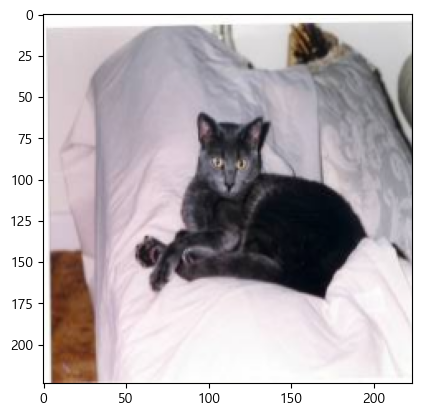

In [273]:
plt.imshow(X[0])
print(y[0], trainset.index_to_class[y[0].item()])

In [276]:
trainset2 = OxfordPetDataset(train_file_list, class_to_index, index_to_class, 
                                      transform=transforms.ToTensor())

In [282]:
b = trainset[0][0]
type(b), b.min(), b.max(), b.shape

(numpy.ndarray, 0, 242, (224, 224, 3))

In [281]:
a = trainset2[0][0]
type(a), a.min(), a.max(), a.shape

(torch.Tensor, tensor(0.), tensor(0.9490), torch.Size([3, 224, 224]))

In [ ]:
########################
# OxfordPetDataset 객체 생성
trainset = OxfordPetDataset2("저장경로", mode="train or valid or test")
# 파일목록, RGB아닌 것들 제거하고, train Dataset 생성 해서 반환.

In [ ]:
import os
import re
from glob import glob
import tarfile
from PIL import Image
import cv2

from torch.utils.data import Dataset


class OxfordPetDataset2(Dataset):
    def __init__(self, root, split, transform=None):
        self.root = root
        self.split = split
        self.transform = transform
        # trainset, validation set 구분 기준 index
        self.train_idx = int(200 * 0.7) # trainset 기준 index
        self.val_idx = self.train_idx + int(200*0.2)
        
        # RGB 이미지 빼고 제거 + file_list 생성
        self.file_list = self._remove_not_rgb()
        self.file_list.sort()  ####################### sort 필수(linux, mac은 정렬이 안되있다.)
        # index_to_class, class_to_index 생성
        self.index_to_class, self.class_to_index = self._create_class_index()
        # 파일 경로 목록 생성
        self.split_file_list = self._create_split_file_list(split)

    def _create_split_file_list(self, split):
        """
        split(train/valid/test) 별 파일 경로 list 반환
        Parameter
            split:str train/valid/test 
        return
            list: 파일 경로 List
        """
        split_file_list = []
        cnt = 0
        previous_class = None
        for path in self.file_list:
            file_name = os.path.splitext(os.path.basename(path))[0]  # 디렉토리 빼고 확장자 빼고 파일명만 추출
            class_name = re.sub(r"_\d+", "", file_name)
            if previous_class == class_name:
                cnt += 1
            else:
                cnt = 1
                

            if split=="train":
                if cnt <= self.train_idx:
                    split_file_list.append(path)
            elif split=="valid":
                if cnt > self.train_idx and cnt <= self.val_idx:
                    split_file_list.append(path)
            elif split=="test":
                if cnt > self.val_idx:
                    split_file_list.append(path)
            else:
                raise Exception(f"split은 train/valid/test 중 하나를 입력하세요.")
            
            previous_class = class_name
            
        return split_file_list

        
    def _create_class_index(self):
        """
        index: class index, class: class_name
        파일명 label을 이용해 index_to_class 리스트, class_to_index dictionary 생성
        return
            tuple: index_to_class, class_to_index
        """
        class_name_set = set()  # 빈 set. 여기에 파일명들을 저장. -> 중복 제거를 위해서 set사용.
        for file in self.file_list:
            file_name = os.path.basename(file)
            label = re.sub('_\d+.jpg', "", file_name)
            class_name_set.add(label)
        index_to_class = list(class_name_set)
        index_to_class.sort()
        class_to_index = {value:index for index, value in enumerate(index_to_class)}
        return index_to_class, class_to_index

    
    def _remove_not_rgb(self):
        """
        데이터파일에서 RGB 를 제외한 이미지 제거
        """
        file_list = glob(os.path.join(self.root, "*.jpg"))
        for file in file_list:
            # 이미지파일과 연결
            with Image.open(file) as img:
                image_mode = img.mode # "RGB", "L": grayscale, 
                
            if image_mode != "RGB": # RGB 가 아닌 파일은 제거
                os.remove(file)
        
        return glob(os.path.join(self.root, "*.jpg"))  # 파일목록 리턴

    
    def __len__(self):
        return len(self.split_file_list)
        
    def __getitem__(self, index):
        path = self.split_file_list[index]
        # x - input
        img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
        
        img = cv2.resize(img, (224, 224))
        
        if self.transform is not None:
            img = self.transform(img)       
        # y - output
        class_name = re.sub(r"_\d+\.jpg", "", os.path.basename(path))
        class_index = self.class_to_index[class_name]
        return img, class_index
        
    def __str__(self):
        return f"OxfordPet Dataset\nSplit: {self.split}\n총데이터수: {self.__len__()}"

# Dataset을 이용해 CSV파일에 저장된 데이터셋 로딩

## torchvision.datasets.ImageFolder 이용
- 영구저장장치(HDD)에 파일로 저장된 image들을 쉽게 로딩할 수 있도록 한다.
- train/validation/test 데이터셋을 저장하는 디렉토리에 class 별로 디렉토리를 만들고 이미지를 저장한다.
  
![img](figures/image_folder_dir.png)

In [283]:
# gdown: google drive 의 파일을 다운로드 하는 라이브러리.
!pip install gdown --upgrade

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ----------------------------------- ---- 51.2/57.6 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 57.6/57.6 kB 1.5 MB/s eta 0:00:00
  Using cached PySocks-1.7.1-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   ---------------------------------------- 78.3/78.3 kB ? eta 0:00:00
Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)


In [285]:
import os
from zipfile import ZipFile
import gdown
def down_extract():
    os.makedirs(r'C:\Classes\deeplearning\datasets', exist_ok=True)
    url = 'https://drive.google.com/uc?id=1YIxDL0XJhhAMdScdRUfDgccAqyCw5-ZV'
    fname = r'C:\Classes\deeplearning\datasets\cats_and_dogs_small.zip'

    gdown.download(url, fname, quiet=False)
    
    #zipfile모듈: Zip 압축파일을 다루는 모듈(압축하기, 풀기)
    from zipfile import ZipFile
    # 압축풀기: ZipFile(압축파일경로).extractall(풀경로) # 디렉토리 없으면 생성해 준다.
    with ZipFile(fname) as zipFile:
        zipFile.extractall(os.path.join(r'C:\Classes\deeplearning\datasets','cats_and_dogs_small'))
        
down_extract()        

Downloading...
From (original): https://drive.google.com/uc?id=1YIxDL0XJhhAMdScdRUfDgccAqyCw5-ZV
From (redirected): https://drive.google.com/uc?id=1YIxDL0XJhhAMdScdRUfDgccAqyCw5-ZV&confirm=t&uuid=48c2a56a-a966-4577-ade4-36536fbdfa66
To: C:\Classes\deeplearning\datasets\cats_and_dogs_small.zip
100%|███████████████████████████| 90.8M/90.8M [00:01<00:00, 56.8MB/s]


# 모델 성능 평가를 위한 데이터셋 분리
- **Train 데이터셋 (훈련/학습 데이터셋)**
    - 모델을 학습시킬 때 사용할 데이터셋.
- **Validation 데이터셋 (검증 데이터셋)**
    - 모델의 성능 중간 검증을 위한 데이터셋
- **Test 데이터셋 (평가 데이터셋)**
    - 모델의 성능을 최종적으로 측정하기 위한 데이터셋
    - **Test 데이터셋은 마지막에 모델의 성능을 측정하는 용도로 한번만 사용한다.**
 
## 검증(validation), 평가(test) 데이터셋을 나누는 이유
-   모델을 훈련하고 성능 검증했을 때 원하는 성능이 나오지 않으면 모델의 여러 설정(하이퍼파라미터)들을 수정한 뒤에 다시 훈련시키고 검증을 하게 된다. 그리고 원하는 성능이 나올때 까지 설정변경->훈련->검증을 반복하게 된다. 이 작업이 **모델링(Modeling)** 이다.
-   위 사이클을 반복하게 되면 검증 결과를 바탕으로 설정을 변경하게 되므로 검증 할 때 사용한 데이터셋(Test set)에 모델이 맞춰서 훈련하는 것과 동일한 효과를 내게 된다.(설정을 변경하는 이유가 Test set에 대한 결과를 좋게 만들기 위해 변경하므로) 그래서 Train dataset과 Test dataset 두 개의 데이터셋만 사용하게 되면 **모델의 성능을 제대로 평가할 수 없게 된다.** 그래서 데이터셋을 train set, validation set, test set으로 나눠 train set 와 validation set을 사용해 훈련과 검증을 해 모델을 최적화 한 뒤 마지막에 test set으로 최종 평가를 한다.

> - **(Parameter)머신러닝 모델 파라미터**
>    - 성능에 영향을 주는 값으로 최적화의야 하는 대상내는 값을 찾아야 한다.
>       - **하이퍼파라미터(Hyper Parameter)**
>            - 사람이 직접 설정해야하는 파라미터 값으로 주로 어떻게 모델을 학습시킬지에 대한 모델설정 값이다.
>            - 딥러닝에서는 학습률, Epoch수, batch size, optimizer, loss 함수 등 다양한 하이퍼파라미터가 있다.
>       - **파라미터(Parameter)**
>            - 모델의 함수를 데이터에 맞추기 위한 값으로 학습을 통해 찾는 변수.
>            - 딥러닝 모델에서는 weight와 bias 가 파라미터다.

## Dataset 분리

### torch.utils.data.Subset을 이용

- Dataset의 일부를 가지는 부분집합 데이터셋을 생성
- 주로 사용하는 곳
    1. 데이터 셋을 분리
    2. 전체 데이터 셋에서 일부 데이터를 추출 할 때
    3. 데이터셋에서 특정 데이터만 골라서 추출할 때 (ex: 특정 class만 추출하는 경우)

### random_split() 함수 이용

- Dataset객체와 나눌 데이터셋들의 원소개수를 리스트로 묶어서 전달하면  Shuffle후 나눈뒤 그 결과를 Subset객체들을 리스트에 담아 반환한다.